In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math
from statistics import mean
import datetime as dt
import numpy as np
from bokeh.plotting import show
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import tree 

import seaborn as sns
sns.set_style("ticks")
sns.set_context("notebook", rc={"lines.linewidth": 2})

import statistics as stat
import random
import matplotlib.pyplot as plt
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

pd.set_option("display.max_columns", None)

# <span style='color:green'> [done] </span>Loading Features data

In [2]:
loc = "data/"
file = 'ufc_data_features.csv'
df = pd.read_csv(loc+file)
df = df[df.columns[1:]]
df.tail(3)

,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6767,win,Aleksandra Albu,Kailin Curran,2017-07-29,Women's Strawweight,U-DEC:,0.002599,-0.150387,1.596351,0.034102,0.175174,-0.233787,0.537425,-0.163484,0.577670,0.332931,0.483835,-1.276585,0.353931,2.057746,0.573711,-2.150067
6768,win,Jarred Brooks,Eric Shelton,2017-07-29,Flyweight,S-DEC:,0.002599,-0.150387,1.596351,0.034102,0.979212,0.222313,0.772330,0.410080,-0.300211,0.332931,-0.147473,-0.096206,-0.050731,0.012252,0.002279,-1.073841
6769,win,Drew Dober,Joshua Burkman,2017-07-29,Lightweight,KO/TKO:Punch,1.356194,0.150410,0.016048,0.034102,-0.969464,-0.654802,-0.603540,-0.163484,1.108188,-0.235426,0.618678,-0.011893,0.977409,0.140095,0.002279,-2.150067


# <span style='color:green'> [done] </span> X = Feature definition:

In [3]:
X = df.columns[10:len(df.columns)-1]
X

Index(['td avg._dif', 'td acc._dif', 'td def._dif', 'sub. avg._dif',
       'slpm_dif', 'str. acc._dif', 'sapm_dif', 'str. def_dif',
       'stance_win_ratio', 'win_perc_dif', 'win_strk_dif'],
      dtype='object')

## <span style='color:green'> **[done]** </span> Clean(if needed) outliers for more accurate model


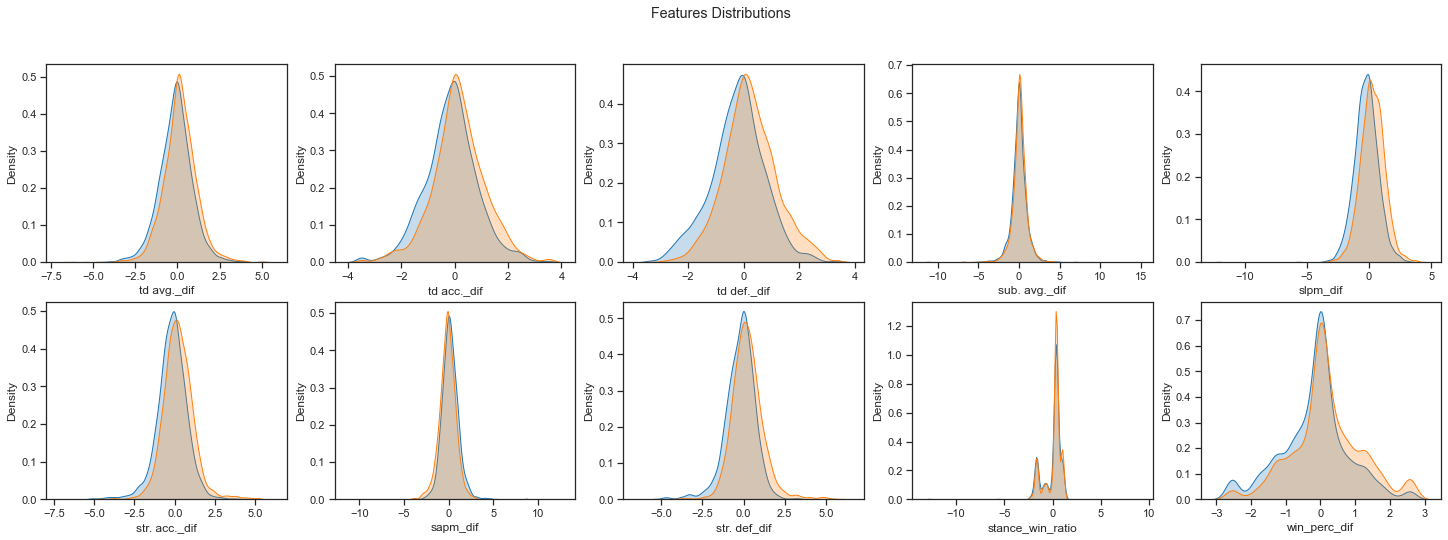

In [4]:
rows= 2
cols= int(len(X)/2)
fig, axs = plt.subplots(rows,cols,figsize = (25,8))
fig.suptitle('Features Distributions')

for i in range(0,cols):
    sns.kdeplot(ax=axs[0,i], data=df[df.result == 'lose'], x=X[i], fill=True)
    sns.kdeplot(ax=axs[0,i], data=df[df.result == 'win'], x=X[i], fill=True)

for i in range(0,cols):
    sns.kdeplot(ax=axs[1,i], data=df[df.result == 'lose'], x=X[i+cols], fill=True)
    sns.kdeplot(ax=axs[1,i], data=df[df.result == 'win'], x=X[i+cols], fill=True)

for the most part fighter's sklill are similar when they meet in the octagon = not many outlier ( > 3 sigma data points).
i will clear any > 3 sigma data points

In [5]:
original_size = len(df)

for feature in X:
    df = df[df[feature] <= 3]
    
print('Rows deleted: %d' %(original_size-len(df)))

Rows deleted: 308


## <span style='color:green'> **[done]** </span> EDA for predicting 'kd_dif', 'str_dif', 'td_dif', 'sub_dif' (=fight statistics)
all features are normalized > only correlated features will be included in finale model

str_dif correlation:


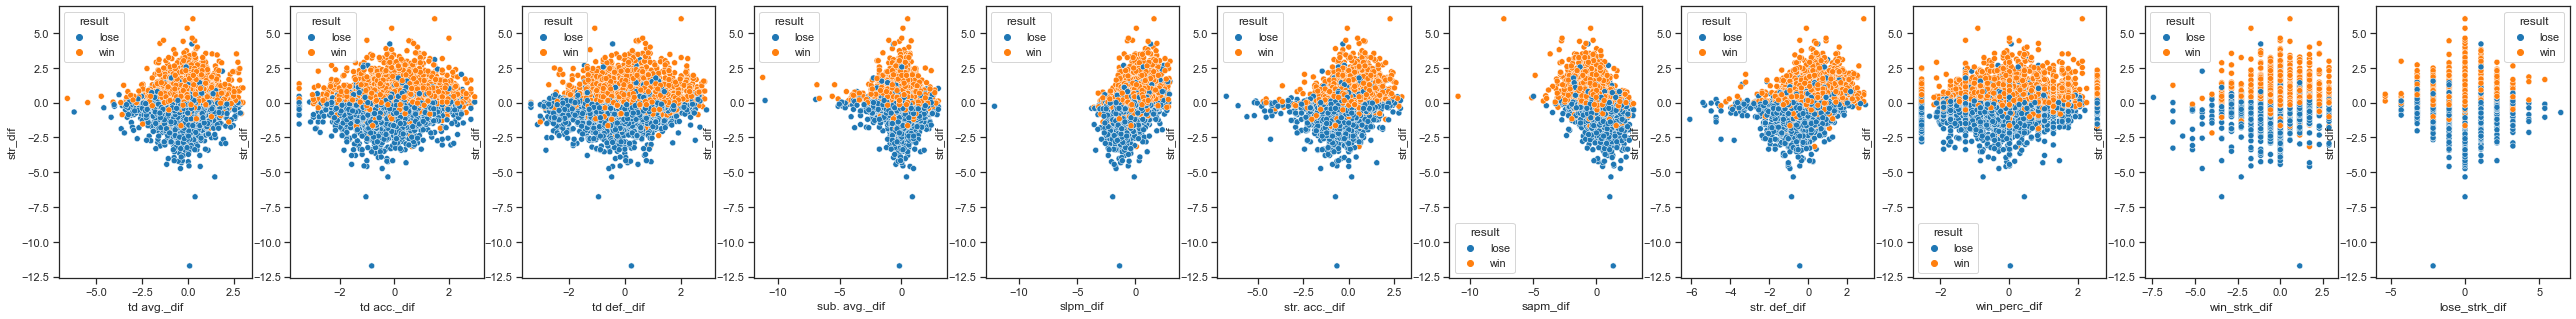

In [6]:
features = ['result','str_dif','td avg._dif','td acc._dif',
            'td def._dif','sub. avg._dif','slpm_dif','str. acc._dif',
            'sapm_dif','str. def_dif','win_perc_dif','win_strk_dif','lose_strk_dif']
rows = 1
cols = len(features)-2
fig, axs = plt.subplots(rows,cols,figsize = (45,5))
print('str_dif correlation:')

for i,column in zip(range(0,len(features)),features[2:]):
    sns.scatterplot(ax=axs[i],y='str_dif',x=column,data=df,hue='result')

kd_dif correlation:


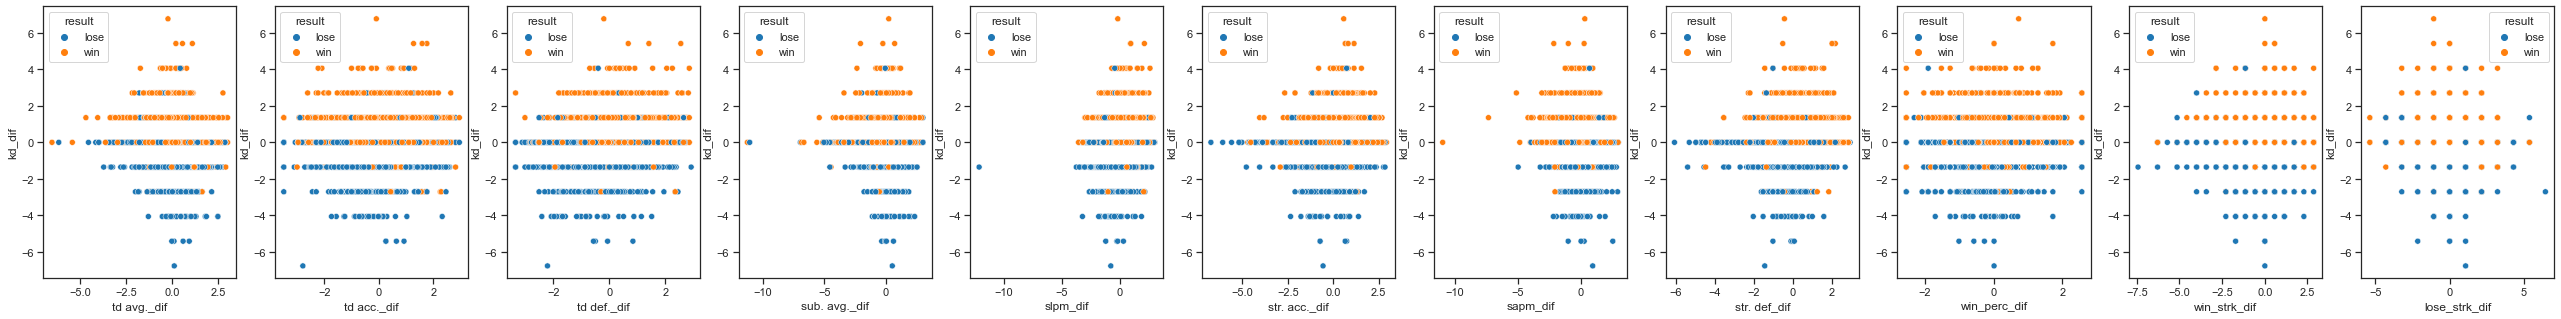

In [7]:
features = ['result','kd_dif','td avg._dif','td acc._dif',
            'td def._dif','sub. avg._dif','slpm_dif','str. acc._dif',
            'sapm_dif','str. def_dif','win_perc_dif','win_strk_dif','lose_strk_dif']
rows = 1
cols = len(features)-2
fig, axs = plt.subplots(rows,cols,figsize = (45,5))
print('kd_dif correlation:')

for i,column in zip(range(0,len(features)),features[2:]):
    sns.scatterplot(ax=axs[i],y='kd_dif',x=column,data=df,hue='result')

td_dif correlation:


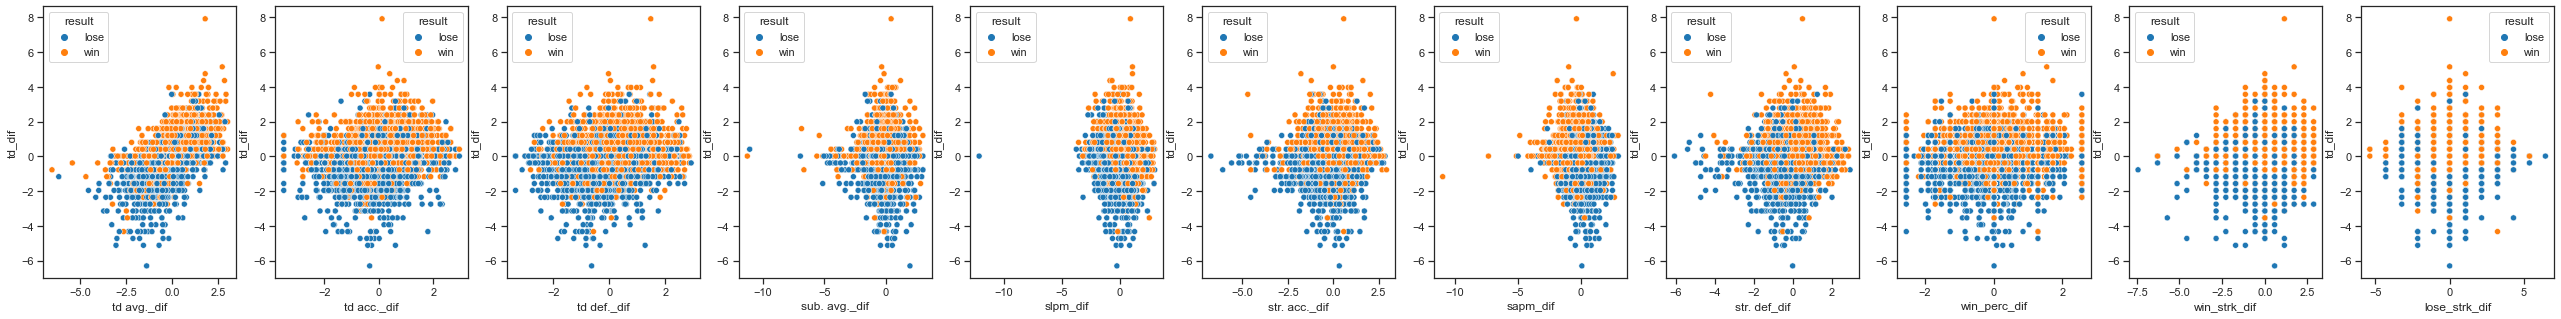

In [8]:
features = ['result','td_dif','td avg._dif','td acc._dif',
            'td def._dif','sub. avg._dif','slpm_dif','str. acc._dif',
            'sapm_dif','str. def_dif','win_perc_dif','win_strk_dif','lose_strk_dif']
rows = 1
cols = len(features)-2
fig, axs = plt.subplots(rows,cols,figsize = (45,5))
print('td_dif correlation:')

for i,column in zip(range(0,len(features)),features[2:]):
    sns.scatterplot(ax=axs[i],y='td_dif',x=column,data=df,hue='result')

only ['td avg._dif','td def._dif','str. acc._dif'] have correlation to td_dif  = will include as feature

sub_dif correlation:


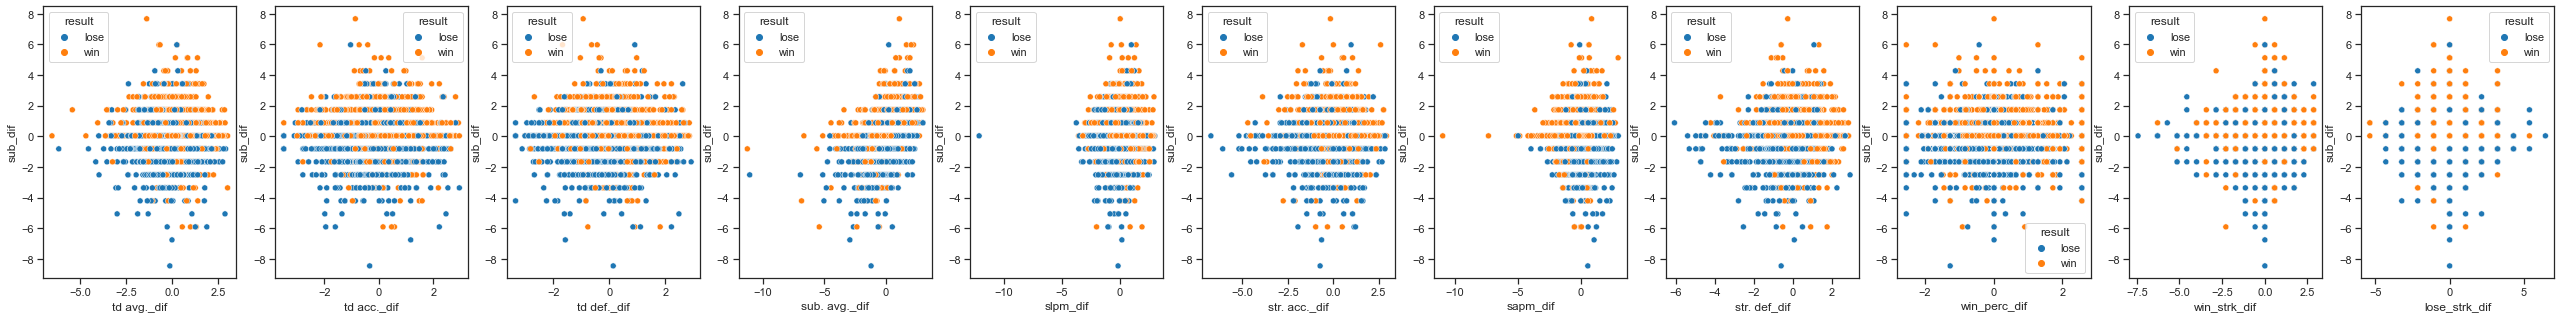

In [9]:
features = ['result','sub_dif','td avg._dif','td acc._dif',
            'td def._dif','sub. avg._dif','slpm_dif','str. acc._dif',
            'sapm_dif','str. def_dif','win_perc_dif','win_strk_dif','lose_strk_dif']
rows = 1
cols = len(features)-2
fig, axs = plt.subplots(rows,cols,figsize = (45,5))
print('sub_dif correlation:')

for i,column in zip(range(0,len(features)),features[2:]):
    sns.scatterplot(ax=axs[i],y='sub_dif',x=column,data=df,hue='result')

### <span style='color:green'> [done] </span> Correlations Report:

In [10]:
def get_r_score(X, y):
    from scipy.stats import pearsonr
    r, _ = pearsonr(X, y)
    return r

In [12]:
def get_significant_features(data):
    '''return list of most significant columns from corr data frame'''
    import numpy as np
    sig_featurs = {}
    
    for column in data.columns:
        for predictor in data.index.values:
            
            not_one = data.loc[predictor,column] < 1
            max_sig_predictor = data.loc[predictor,column] == np.max(data[column])
            bigger_than_median = data.loc[predictor,column] > np.median(data[column]) + np.std(data[column])
            
            if (not_one and (bigger_than_median or max_sig_predictor)):    
                sig_featurs[predictor] = data.loc[predictor,column]
                
    return sig_featurs

---------------------------------------------
Correlation Report: Most significant features
---------------------------------------------
Most significant:
 {'slpm_dif': 0.42, 'td def._dif': 0.14, 'sapm_dif': 0.33, 'str. acc._dif': 0.26, 'str. def_dif': 0.29, 'sub. avg._dif': 0.4, 'td avg._dif': 0.58}


y,kd_dif,str_dif,sub_dif,td_dif
X,,,,
lose_strk_dif,0.05,0.03,0.0,0.01
sapm_dif,0.04,0.33,0.01,0.14
slpm_dif,0.16,0.42,0.03,0.05
str. acc._dif,0.1,0.26,0.04,0.07
str. def_dif,0.09,0.29,0.05,0.11
sub. avg._dif,0.07,0.05,0.4,0.04
sub_dif,0.02,0.05,1.0,0.06
td acc._dif,0.05,0.14,0.0,0.18
td avg._dif,0.08,0.07,0.04,0.58


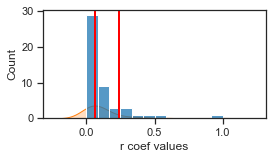

In [13]:
rdf = pd.DataFrame(columns=['y','X','r_coef'])
r_list = []
y_columns = ['kd_dif','str_dif','td_dif','sub_dif']

i = 0 
for y_column in y_columns:
    for x_column in features[1:]:
        rdf.loc[i, 'X'] = x_column
        rdf.loc[i, 'y'] = y_column
        rdf.loc[i, 'r_coef'] = np.round(np.abs(get_r_score(X=df[x_column], y=df[y_column])),2)
        r_list.append(rdf.loc[i, 'r_coef'])
        i += 1

rdf = rdf.pivot('X','y','r_coef')
print('---------------------------------------------')
print('Correlation Report: Most significant features')
print('---------------------------------------------')
sig_features = get_significant_features(data=rdf)
print('Most significant:\n %s' %(sig_features) )

g = plt.figure(figsize=(4,2))
g = sns.histplot(x = r_list, bins=len(rdf))
g = sns.kdeplot(x = r_list, fill=True)
plt.axvline(x = np.median(r_list)+np.std(r_list), color='red')
plt.axvline(x = np.median(r_list), color='red')
plt.xlabel("r coef values")
plt.ylabel("Count")
rdf

features with R coef > red line is significant enough to be included

### <span style='color:green'> [done] </span> Creating relevant data set:

In [14]:
X_columns = list(sig_features)
print('Predictors to Fight stats: ' + str(X_columns))

Predictors to Fight stats: ['slpm_dif', 'td def._dif', 'sapm_dif', 'str. acc._dif', 'str. def_dif', 'sub. avg._dif', 'td avg._dif']


In [15]:
fdf = (df[X_columns]).copy()
for y_column in ['kd_dif','str_dif','td_dif','sub_dif']:
    fdf[y_column] = df[y_column]

fdf['fighter'] = df['fighter']
fdf['opponent'] = df['opponent']
fdf['result'] = df['result']
fdf = (fdf.dropna()).reset_index(drop=True)
fdf.tail(3)

,slpm_dif,td def._dif,sapm_dif,str. acc._dif,str. def_dif,sub. avg._dif,td avg._dif,kd_dif,str_dif,td_dif,sub_dif,fighter,opponent,result
6459,0.577670,0.537425,0.483835,0.332931,-1.276585,-0.163484,0.175174,0.002599,-0.150387,1.596351,0.034102,Aleksandra Albu,Kailin Curran,win
6460,-0.300211,0.772330,-0.147473,0.332931,-0.096206,0.410080,0.979212,0.002599,-0.150387,1.596351,0.034102,Jarred Brooks,Eric Shelton,win
6461,1.108188,-0.603540,0.618678,-0.235426,-0.011893,-0.163484,-0.969464,1.356194,0.150410,0.016048,0.034102,Drew Dober,Joshua Burkman,win


In [16]:
X = fdf[X_columns]
y_columns = fdf.columns[fdf.columns.get_loc('kd_dif'):fdf.columns.get_loc('kd_dif')+4]
y = fdf[y_columns]

print('X = ' + str(X_columns))
print('y = '+ str(y_columns))

X = ['slpm_dif', 'td def._dif', 'sapm_dif', 'str. acc._dif', 'str. def_dif', 'sub. avg._dif', 'td avg._dif']
y = Index(['kd_dif', 'str_dif', 'td_dif', 'sub_dif'], dtype='object')


# <span style='color:green'> [done] </span> Splitting data to Training set/Test set/Validation:

In [17]:
def set_train_test(X_columns=X_columns, y_columns=y_columns, data=fdf, test_size=0.3, valid_size=0.1):
    
    if 'set' not in data.columns:
        data.insert(0, 'set', None) # inserd 'set' column to position 0

    for i in range(len(df)):
        
        if random.random() < test_size:
            data.loc[i,'set'] = 'test'
        else:
            if random.random() < valid_size:
                data.loc[i,'set'] = 'validation'
            else:
                data.loc[i,'set'] = 'train' 

    X_train = data[X_columns][data.set=='train'] 
    X_test = data[X_columns][data.set=='test']
    y_train = data[y_columns][data.set=='train']
    y_test = data[y_columns][data.set=='test']
    X_val = data[X_columns][data.set=='validation']
    y_val = data[y_columns][data.set=='validation']

    print('Data split: Data=%s, train_set=%s, validation_set=%s, test_set=%s'  %(str(data.shape), str(X_train.shape), str(X_val.shape), str(X_test.shape)))
    return data

# <span style='color:green'> **[done]** </span> Predicting Fight stats:

## <span style='color:green'> **[done]** </span> Train KNN Classifier:

In [18]:
def set_knn_reg(X_columns=X_columns, y_columns=y_columns, data=df, n=10):
    
    from sklearn.neighbors import KNeighborsRegressor
    
    knn_reg=KNeighborsRegressor(n_neighbors=n, algorithm='ball_tree')
    X_train = data[X_columns][data.set=='train']
    y_train = data[y_columns][data.set=='train']
    knn_reg.fit(X_train,y_train)
    return knn_reg

In [19]:
def set_predictions(model, data=df, X_columns=X_columns, y_columns=y_columns):
    
    for column in y_columns:
        data[column + '_pred'] = None
        data[column + '_pred'] = model.predict(data[X_columns])
    
    return data

In [20]:
def get_rmse(act, pred):
    
    from sklearn.metrics import mean_squared_error
    import math
    return round(math.sqrt(mean_squared_error(act, pred))/(np.max(act) - np.min(act)),4)

In [21]:
data =fdf
fdf = set_train_test(X_columns=X_columns, y_columns=y_columns, data=data, test_size=0.3, valid_size=0.1)
knn_reg = set_knn_reg(X_columns=X_columns, y_columns=y_columns, data=data, n=5)
fdf = set_predictions(model=knn_reg, data=data, X_columns=X_columns, y_columns=y_columns)
knn_reg
fdf.tail(3)

Data split: Data=(6462, 15), train_set=(4096, 7), validation_set=(452, 7), test_set=(1914, 7)


,set,slpm_dif,td def._dif,sapm_dif,str. acc._dif,str. def_dif,sub. avg._dif,td avg._dif,kd_dif,str_dif,td_dif,sub_dif,fighter,opponent,result,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
6459,train,0.577670,0.537425,0.483835,0.332931,-1.276585,-0.163484,0.175174,0.002599,-0.150387,1.596351,0.034102,Aleksandra Albu,Kailin Curran,win,1.356194,1.356194,1.356194,1.356194
6460,train,-0.300211,0.772330,-0.147473,0.332931,-0.096206,0.410080,0.979212,0.002599,-0.150387,1.596351,0.034102,Jarred Brooks,Eric Shelton,win,-1.080276,-1.080276,-1.080276,-1.080276
6461,train,1.108188,-0.603540,0.618678,-0.235426,-0.011893,-0.163484,-0.969464,1.356194,0.150410,0.016048,0.034102,Drew Dober,Joshua Burkman,win,0.002599,0.002599,0.002599,0.002599


## <span style='color:green'> **[done]** </span> Tune Model parameters:

In [22]:
traindf = pd.DataFrame(columns=['neighbors','rmse','kd_dif_rmse','str_dif_rmse','td_dif_rmse','sub_dif_rmse'])
fdf = set_train_test(X_columns=X_columns, y_columns=y_columns, data=fdf, test_size=0.3, valid_size=0.1)

for n in np.arange(1,50,5):
    index = len(traindf)
    traindf.loc[index, 'neighbors'] = n
    
    knn_reg = set_knn_reg(X_columns=X_columns, y_columns=y_columns, data=fdf, n=n)
    fdf = set_predictions(model=knn_reg, data=fdf, X_columns=X_columns, y_columns=y_columns)
    
    for stat in y_columns:
        y_val_act = fdf[stat][fdf.set=='validation']
        y_val_pred = fdf[stat+'_pred'][fdf.set=='validation']
        traindf.loc[index, stat+'_rmse'] = get_rmse(act=y_val_act, pred=y_val_pred)

    traindf.loc[index,'rmse'] = 0.25 * (traindf.loc[index,'kd_dif_rmse'] + traindf.loc[index,'str_dif_rmse'] + traindf.loc[index,'td_dif_rmse'] + traindf.loc[index,'sub_dif_rmse'])
    
traindf

Data split: Data=(6462, 19), train_set=(4099, 7), validation_set=(437, 7), test_set=(1926, 7)


,neighbors,rmse,kd_dif_rmse,str_dif_rmse,td_dif_rmse,sub_dif_rmse
0,1,0.1584,0.1525,0.1369,0.197,0.1472
1,6,0.1172,0.1107,0.1036,0.1456,0.1089
2,11,0.114225,0.1072,0.101,0.141,0.1077
3,16,0.11305,0.1057,0.0992,0.1404,0.1069
4,21,0.1117,0.1046,0.0992,0.1377,0.1053
5,26,0.111225,0.1043,0.099,0.1365,0.1051
6,31,0.110825,0.1039,0.099,0.1363,0.1041
7,36,0.110675,0.1034,0.0988,0.1366,0.1039
8,41,0.110525,0.103,0.0989,0.1366,0.1036
9,46,0.1104,0.1033,0.099,0.136,0.1033


DataError: No numeric types to aggregate

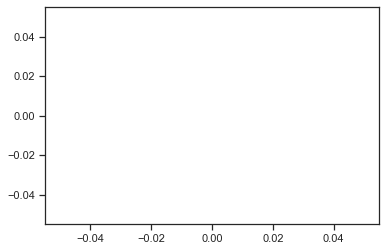

In [25]:
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

DataError: No numeric types to aggregate

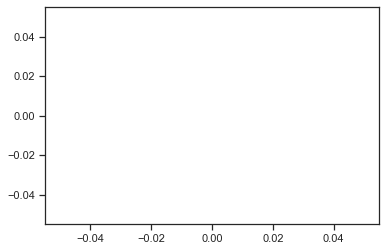

In [23]:
min_rmse = np.min(traindf['rmse'])
opt_n = np.min(traindf['neighbors'][traindf.rmse == min_rmse])

for stat in ['kd','str','td','sub']:
    g = sns.lineplot(data=traindf, y= stat + '_dif_rmse', x='neighbors', label=stat + '_dif RMSE%')
    
#g = sns.lineplot(data=traindf, y='rmse', x='neighbors', label='RMSE%') 
#g = sns.lineplot(y=traindf['rmse'], x= opt_n) 

#g.set_title('RMSE% error vs model complexity', fontsize=15)
#g.set_xlabel('n_neigbors', fontsize=14)
#g.set_ylabel('RMSE%', fontsize=14)
#g.legend()

#print('Best Tuned Model(=min neighbors + min average_rmse error):')
#best_model = traindf[traindf.neighbors == opt_n]
#best_model

best model is average model for as many neighbors as possible, but it doesnt get a lot better after 6 neighbors,
so im choosing simple n=6 model to work with

In [ ]:
n = 6
knn_reg = set_knn_reg(X_columns=X_columns, y_columns=y_columns, data=fdf, n=n)
fdf = set_predictions(model=knn_reg, data=fdf, X_columns=X_columns, y_columns=y_columns)
knn_reg

## <span style='color:green'> **[done]** </span> Model evaluation (=Test_set score):

In [ ]:
testdf = pd.DataFrame(columns=['neighbors','rmse','kd_dif_rmse','str_dif_rmse','td_dif_rmse','sub_dif_rmse'])

for stat in y_columns:
    testdf.loc[index, 'neighbors'] = n
    y_test_act = fdf[stat][fdf.set=='test']
    y_test_pred = fdf[stat+'_pred'][fdf.set=='test']
    testdf.loc[index, stat+'_rmse'] = get_rmse(act=y_test_act, pred=y_test_pred)

testdf.loc[index,'rmse'] = 0.25 * (testdf.loc[index,'kd_dif_rmse'] + testdf.loc[index,'str_dif_rmse'] + testdf.loc[index,'td_dif_rmse'] + testdf.loc[index,'sub_dif_rmse'])
    


print('RMSE% for fight stat:')
testdf

## <span style='color:green'> **[done]** </span> Opt Model view:

In [ ]:
rows=1
cols=4
data = fdf[fdf.set == 'test']
plt.figure(figsize = (12,15))
fig, axs = plt.subplots(rows,cols,figsize = (18,5))
fig.suptitle('Visualization of predicted(=orange) vs actual(=blue) Train_set values:')

sns.kdeplot(ax=axs[0],x=data['kd_dif'],fill=True)
sns.kdeplot(ax=axs[0],x=data['kd_dif_pred'],fill=True)

sns.kdeplot(ax=axs[1],x=data['str_dif'],fill=True)
sns.kdeplot(ax=axs[1],x=data['str_dif_pred'],fill=True)

sns.kdeplot(ax=axs[2],x=data['td_dif'],fill=True)
sns.kdeplot(ax=axs[2],x=data['td_dif_pred'],fill=True)

sns.kdeplot(ax=axs[3],x=data['sub_dif'],fill=True)
sns.kdeplot(ax=axs[3],x=data['sub_dif_pred'],fill=True)

we can see that model predicting the average stat produce the best model (= the features is not very strong predictors)

# <span style='color:green'> **[done]** </span> Predicting Fight outcome (=win/lose):

In [ ]:
def set_desicion_tree_clf(X_columns=X_columns, y_columns=y_columns, data=df, tree_depth=len(data.columns)):
    
    from sklearn.tree import DecisionTreeClassifier
    tree_clf = DecisionTreeClassifier(max_depth=tree_depth, random_state=1)
    X_train = data[X_columns][data.set=='train']
    y_train = data[y_columns][data.set=='train']
    tree_clf.fit(X_train,y_train)
    
    return tree_clf

In [ ]:
def set_forest_clf(X_columns, y_columns, n_estimators, tree_depth, data):
    
    from sklearn.ensemble import RandomForestClassifier
    forest_clf = RandomForestClassifier(max_depth=tree_depth, random_state=0, n_estimators=n_estimators)
    
    X_train = data[X_columns][data.set=='train']
    y_train = data[y_columns][data.set=='train']
    forest_clf.fit(X_train,y_train)
    
    return forest_clf

In [ ]:
def get_accuracy(act, pred):
    
    from sklearn.metrics import accuracy_score
    return accuracy_score(act, pred)

In [ ]:
X_columns = list(df.columns[18:len(df.columns)])
fight_stats = ['kd_dif','str_dif','td_dif','sub_dif']
X_columns.extend(fight_stats)
y_columns = 'result'
print(X_columns)
print(y_columns)

In [ ]:
pdf = (df[X_columns]).copy()
pdf[y_columns] = df[y_columns]
pdf = (pdf.dropna()).reset_index(drop=True)
pdf.tail()

## <span style='color:green'> **[done]** </span> Train Random Forest model:

In [ ]:
pdf = set_train_test(X_columns=X_columns, y_columns='result', data=pdf, test_size=0.3, valid_size=0.1)
forest_clf = set_forest_clf(X_columns=X_columns, y_columns='result', data=pdf,tree_depth=2, n_estimators=100 )
pdf = set_predictions(model=forest_clf, data=pdf, X_columns=X_columns, y_columns=[y_columns])
print('Score: ' + str(get_accuracy(act=pdf['result'], pred=pdf['result_pred'])))
forest_clf

## <span style='color:green'> **[done]** </span> Tune model parameters:

In [ ]:
traindf = pd.DataFrame(columns=['n_trees','accuracy'])
pdf = set_train_test(X_columns=X_columns, y_columns=y_columns, data=pdf, test_size=0.3, valid_size=0.2)

for n in range(1,200,1):

    index = len(traindf)
    traindf.loc[index, 'n_trees'] = n
    
    forest_clf = set_forest_clf(X_columns=X_columns, y_columns=y_columns, data=pdf, n_estimators=n, tree_depth=len(X_columns))
    pdf = set_predictions(model=forest_clf, data=pdf, X_columns=X_columns, y_columns=[y_columns])
    
    y_val_act = pdf['result'][pdf.set=='validation']
    y_val_pred = pdf['result_pred'][pdf.set=='validation']

    traindf.loc[index, 'accuracy'] = get_accuracy(act=y_val_act, pred=y_val_pred)
    
traindf

In [ ]:
print('Best Parameters:')
best_acc = traindf.accuracy.max()
t = traindf[traindf.accuracy == best_acc]
t = t[t.n_trees == t.n_trees.min()].reset_index(drop=True)
sns.lineplot(y='accuracy', x='n_trees', data=traindf)
t.head()

In [ ]:
n_trees = t.n_trees[0]
pdf = set_train_test(X_columns=X_columns, y_columns='result', data=pdf, test_size=0.3, valid_size=0.1)
forest_clf = set_forest_clf(X_columns=X_columns, y_columns='result', data=pdf, n_estimators=n_trees, tree_depth=len(X_columns))
pdf = set_predictions(model=forest_clf, data=pdf, X_columns=X_columns, y_columns=[y_columns])
print('Accuracy: ' + str(get_accuracy(act=pdf['result'][pdf.set=='test'], pred=pdf['result_pred'][pdf.set=='test'])))
forest_clf

## <span style='color:green'> **[done]** </span> Visualize win/lose Decision Tree model:

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree 

fig = plt.figure(figsize=(16, 30))
f_tree = forest_clf.estimators_[20]
tree.plot_tree(f_tree,
               feature_names = X_columns, 
               class_names= y_columns,
               max_depth=(X.columns).size,
               rounded=True, 
               filled = True,
               proportion = True, 
               precision = 2,
               impurity = True,
               fontsize=14
              );

In [ ]:
rows=2
cols=len(X_columns)
data = pdf[pdf.set == 'test']
fig, axs = plt.subplots(rows,cols,figsize = (15,7))
fig.suptitle('Visualization of loser(=orange) vs winner(=blue) Test_set distribution: row[0]:actual, row[1]:predicted')

for feature,col in zip(X_columns,range(0,cols)):
    sns.kdeplot(ax=axs[0,col],x=data[feature][data.result == 'win'], fill=True)
    sns.kdeplot(ax=axs[0,col],x=data[feature][data.result == 'lose'], fill=True)
    sns.kdeplot(ax=axs[1,col],x=data[feature][data.result_pred == 'win'], fill=True)
    sns.kdeplot(ax=axs[1,col],x=data[feature][data.result_pred == 'lose'], fill=True)


## <span style='color:green'> **[done]** </span> Model evaluation (=Test_set score):

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_test_act = pdf['result'][pdf.set=='test']
y_test_pred = pdf['result_pred'][pdf.set=='test']

print('Accuracy = %.6f' % accuracy_score(y_test_act,y_test_pred))
ConfusionMatrixDisplay.from_predictions(y_test_act,y_test_pred)  

In [ ]:
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>